## 计算物理基础第三章课后练习题解

#### 第1题

用sympy包计算

$$\int_0^1\frac{x^4(1-x)^4}{1+x^2}dx$$

这个积分能用数值积分计算吗？如果可以，应该如何做？

##### 符号积分

In [1]:
from sympy import *
x = symbols('x')
s = integrate(x**4*(1-x)**4/(1+x**2), (x,0,1))
print(s, s.evalf())

-pi + 22/7 0.00126448926734962


##### 数值积分

In [2]:
def f(x):
    return x**4*(1-x)**4/(1+x**2)
from scipy.integrate import quad
s = quad(f,0,1)
print(s)

(0.0012644892673496185, 1.1126990906558069e-14)


#### 第2题

误差函数$erf(x)$的定义是

$$erf(x) = \frac{2}{\sqrt{\pi}}\int_0^x e^{-x^2}dx$$

用指令quad计算当$x = 0.1, 0.2, \cdots, 1.0$时相应的erf函数值。将结果与math.erf函数的结果进行比较。

In [ ]:
from scipy.integrate import quad
import numpy as np
x = np.arange(0.1,1.1,0.1)
def f(x):
    return 2/np.sqrt(np.pi) * np.exp(-x**2)
a = []
for i in x:
    a.append(quad(f,0,i)[0])
print(a)

In [ ]:
import math
for i in x:
    print(math.erf(i))

In [ ]:
from scipy.integrate import cumtrapz
y = 2/np.sqrt(np.pi)*np.exp(-x*x)
z = cumtrapz(y,dx=0.1)
print(z)
'''误差很大'''

#### 第3题

已知室温下氢分子的最概然速率$v_p=1578 m/s$, 试求室温下

(1) 在$0\sim v_p$内的分子数占分子总数的百分比；

(2) 在$0\sim 3.3v_p$内的分子数占分子总数的百分比；

(3) 在3e4~3e8 内的分子数占分子总数的百分比；

注：麦克斯韦速率分布函数为

$$f(v) = 4\pi v^2 \big(\frac{m}{2\pi\kappa T}\big)^{3/2}\exp\big(-\frac{mv^2}{2\kappa T}\big)$$

以最概然速率$v_p = \sqrt{\frac{2\kappa T}{m}}$表示为

$$f(v) = \frac{4}{\sqrt{\pi}}\big(\frac{v^2}{v_p^{3}}\big)\exp\big(-\frac{v^2}{v_p^2}\big)$$

In [4]:
vp = 1578
def f(v):
    return 4/np.sqrt(np.pi)*v**2/vp**3*np.exp(-v**2/vp**2)
a = quad(f,0,vp)
b = quad(f, 0, 3.3*vp)
c = quad(f, 3e4, 3e8)
print(a,b,c)

(0.4275932955291202, 4.747239218717783e-15) (0.9999275194957398, 1.1101425551004903e-14) (0.0, 0.0)


#### 第4题

半径为a的均匀细圆环，环上带$4\pi\varepsilon_0q$的电荷， 求空间的电势与电场分布。要求以等势线，等势面表示
电势，以箭头、场线或其他方式表示电场。

### 解：
如图
<img src="ering.png" title="带电圆环" width=250>
带电圆环上的一个小的电流元dq在空间中任意一点$A(x,y,z)$产生的电势为$$dV=\frac{dq}{4\pi\varepsilon_0 R},$$ 其中$R=\sqrt{(x-a\cos\phi)**2+(y-a\sin\phi)^2+z^2}$. 设$\lambda$代表圆环上单位长度上的电量, 则$\lambda=\dfrac{4\pi\varepsilon_0q}{2\pi a}=\dfrac{2\varepsilon_0q}{a}$, 设圆环放置在$z=0$的平面上，中心在原点. 我们查看$x=0$的平面上任意一点$A(0,y,z)$上的电势. 圆环上位于$(a\cos\phi,a\sin\phi,0)$处的电流源所带电量$dq=\lambda dl=\lambda a d\phi = 2\varepsilon_0q d\phi$, 其在$A$处产生的电势为
$$dV=\frac{d\phi}{2\pi R},$$

其中$R=\sqrt{a^2\cos^2\phi+(y-a\sin\phi)^2+z^2}$, 整个圆环在$A$处的电势为
$$V=\int_0^{2\pi}\frac{d\phi}{2\pi \sqrt{a^2\cos^2\phi+(y-a\sin\phi)^2+z^2}}.$$

(40, 20)

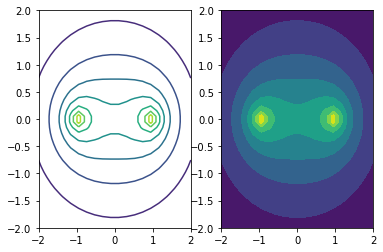

In [1]:
import numpy as np, matplotlib.pyplot as plt
z, y, phi = np.mgrid[-2:2:40j, -2:2:20j, 0:2*np.pi:40j]
a = 1
C = 1/(2*np.pi)
R = np.sqrt((a*np.cos(phi))**2 + (y-a*np.sin(phi))**2 + z**2)
dV = C/R
V = np.trapz(dV)

fig = plt.figure('带电圆环的电势')
plt.subplot(1,2,1)
cs = plt.contour(y[:,:,0], z[:,:,0], V)
plt.subplot(1,2,2)
plt.contourf(y[:,:,0], z[:,:,0], V)
V.shape

电场可以通过电势求梯度得到$$E=-\nabla V$$

Text(0, 0.5, 'z')

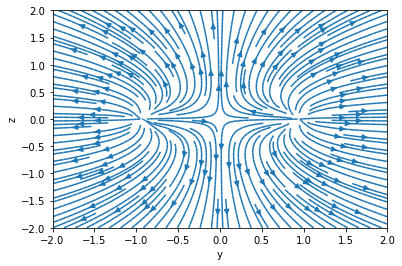

In [5]:
fig = plt.figure()
Ey, Ex = np.gradient(-V, 0.5)
plt.subplot(1,1,1)
plt.streamplot(y[:,:,0], z[:,:,0], Ex, Ey,density=2)
plt.xlabel('y')
plt.ylabel('z')

#### 第5题
亥姆霍兹线圈由两个相同的线圈组成，线圈之间的距离与线圈的半径相等，通过两个线圈的电流方向相同、大小相等，
计算两个线圈之间的磁场。

**半径距离均可调，但是动画不会做。**

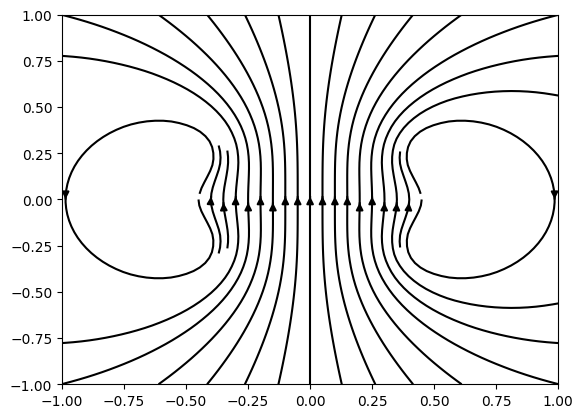

In [21]:
import numpy as np, matplotlib.pyplot as plt

def Helmholtz_coils(r_low, r_up, d):
    '''
    Calculate the Magnetic Field of Helmhotz coils
    r_low: radius of lower coil
    r_up : radius of upper coil
    d: distance between the two coils
    '''

    phi = np.linspace(0, 2*np.pi, 20)

    y = np.linspace(-1,1.,25)
    z = np.linspace(-1,1.,25)

    Y,Z,phi = np.meshgrid(y,z,phi)

    #Calcualte the square root of the distance between the point and dl of the coils
    r1 = np.sqrt((r_low*np.cos(phi))**2 + (Y-r_low*np.sin(phi))**2 + (Z-d/2)**2)
    r2  = np.sqrt((r_up*np.cos(phi))**2 + (Y-r_up*np.sin(phi))**2 + (Z+d/2)**2)

    r1_3 = r1**3
    r2_3 = r2**3

    dby = r_low * (Z-d/2) * np.sin(phi)/r1_3 + r_up * (Z+d/2) * np.sin(phi)/r2_3
    by = np.trapz(dby)
    dbz = r_low *(r_low-Y*np.sin(phi))/r1_3 + r_up *(r_up-Y*np.sin(phi))/r2_3
    bz = np.trapz(dbz)
    
    return Y, Z, by, bz

Y, Z, by, bz = Helmholtz_coils(.5,.5,0.5)

bSY = np.arange(-0.45,0.50,0.05) #流线起点的y坐标
bSY, bSZ = np.meshgrid(bSY,0) #流线起点
points1 = np.vstack([bSY, bSZ])
h1 = plt.streamplot(Y[:,:,0],Z[:,:,0], by, bz, 
                    density=2,color='k',start_points=points1.T)

<h1>6.</h1> 杂志SIAM News的2002年的题目"A Hundred-dollar, Hundred-digit Challenge" 第一个问题是计算

$$T=\lim\limits_{t\to 0}\int_t^1 x^{-1}\cos(x^{-1}\log x)dx$$

In [191]:
from scipy.optimize import fsolve
def f(x,k):
    return np.log(x)/x + (k-0.5)*np.pi
for i in range(5):
    print(fsolve(f,1,i))

[2.7426022]
[1.]
[1.]
[1.]
[1.]


C:\Users\user\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
from sympy.solvers import solve
from sympy import Symbol, log, pi
x = Symbol('x')
out = []
for k in range(100):
    out += solve(log(x)/x + (k-0.5)*pi, x)
#print(out)

In [216]:
%%time
from scipy.integrate import quad
def f(x):
    return np.cos(np.log(x)/x)/x
T = 0.
tol = 1
k = 1
x0 = 1
while tol > 1e-4 and k < 10000:
    T0 = T
    x1 = solve(log(x)/x + (k-0.5)*pi, x)[0]
    Tk = quad(f, x1, x0)[0]
    #print('Tk: ', T,  Tk, tol, k)
    T = T + Tk
    tol = np.abs(T-T0)
    k = k + 1
    x0 = x1
print('final: ', T, k, tol)

final:  0.32341742265412377 5640 9.999070406946364e-05
Wall time: 15min 37s


 <strong>(3)</strong>
艾特肯(Aitken)的$\Delta^2$加速法

$$\tilde{T}=T_k - \frac{(T_{k+1}-T_k)^2}{T_{k+1}-2T_k+T_{k-1}}$$

In [227]:
%%time
x0 = 1
k = 1
Tl = []
T = 0
tol = 1
while tol > 1e-3 and k < 1000:
    T0 = T
    x1 = solve(log(x)/x + (k-0.5)*pi, x)[0]
    Tl.append(quad(f, x1, x0)[0])
    if len(Tl) > 2:
        T = Tl[-2] - (Tl[-1] - Tl[-2])**2/(Tl[-1]-2*Tl[-2]+Tl[-3])
        tol = np.abs(T0-T)
    k = k + 1
    x0 = x1
print('final: ', T, k, tol)

final:  -0.0010996865130728348 1000 0.00220045540385408
Wall time: 2min 34s
